In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.isnull().sum()
df.drop('CustomerID', axis=1, inplace=True)
df_I=df.select_dtypes(exclude='object')
df_C=df.select_dtypes(include='object')

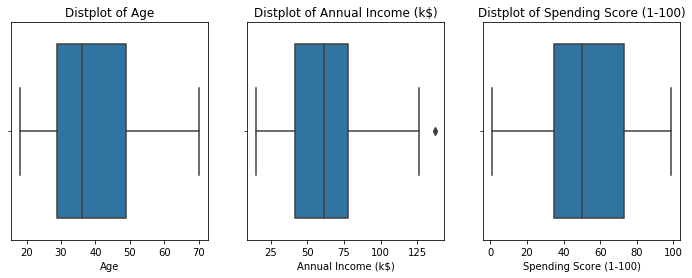

In [4]:
plt.figure(1 ,figsize = (12 , 4))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    sns.boxplot(df_I[x] )
    plt.title('Distplot of {}'.format(x))
plt.show()

In [5]:
from scipy import stats
df_I= df_I[(np.abs(stats.zscore(df_I)) < 2.5).all(axis = 1)]

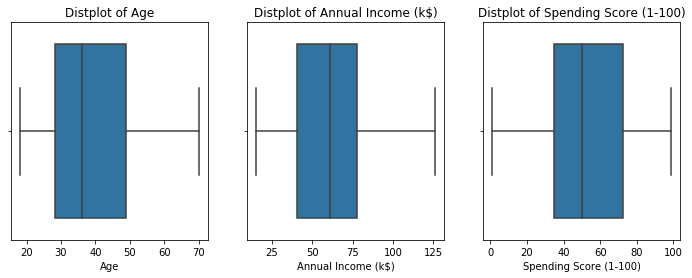

In [6]:
plt.figure(1 ,figsize = (12 , 4))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    sns.boxplot(df_I[x] )
    plt.title('Distplot of {}'.format(x))
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler
normali=StandardScaler()
df_N=pd.DataFrame(normali.fit_transform(df_I))
df_N.set_index(df_I.index,inplace=True)
df_N.columns=df_I.columns

In [8]:
from sklearn.preprocessing import LabelBinarizer
gender=LabelBinarizer()
df_C1=pd.DataFrame(gender.fit_transform(df_C), columns=['Gender'])
df_F=pd.merge(df_C1,df_N,left_index=True,right_index=True)

In [9]:
df_O=pd.merge(df_C, df_I, left_index=True, right_index=True)

In [10]:
from sklearn.cluster import KMeans
elb=[]
for k in range(1,15):
    K_cluster=KMeans(n_clusters=k)
    K_cluster.fit(df_F)
    elb.append(K_cluster.inertia_)

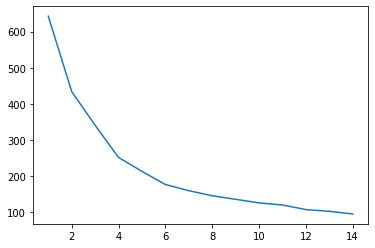

In [11]:
plt.plot(range(1,15),elb)

In [12]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [13]:
K_cluster=KMeans(n_clusters=6)
K_cluster.fit(df_F)
la=K_cluster.labels_
silhouette_score(df_F,la)

0.36278006238945953

In [14]:
df_O['Target_Value']=la

In [15]:
df_O.pivot_table(index="Target_Value", columns="Gender", values=['Age','Annual Income (k$)','Spending Score (1-100)'])
  

Age            Annual Income (k$)             \
Gender           Female       Male             Female       Male   
Target_Value                                                       
0             25.461538  24.400000          25.692308  24.700000   
1             32.190476  33.470588          86.047619  84.176471   
2             54.153846  59.315789          54.230769  54.315789   
3             27.960000  25.153846          57.360000  55.307692   
4             43.785714  39.894737          93.285714  82.421053   
5             41.538462  52.000000          26.538462  25.875000   

             Spending Score (1-100)             
Gender                       Female       Male  
Target_Value                                    
0                         80.538462  73.800000  
1                         81.666667  82.647059  
2                         48.961538  49.210526  
3                         47.120000  53.000000  
4                         20.642857  13.842105  
5                         20.692308  17.250000